# Impact of sampling on the Wasserstein distance between two distributions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import wasserstein_distance

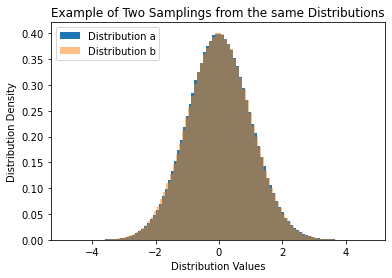

In [2]:
#Set the number of random variables n_variables and the number of points per random variable n_points
n_variables, n_points = 2, 1_000_000

#Generate n_variables*n_points random uniform values
df = pd.DataFrame(np.random.uniform(size=(n_variables,n_points)))

#Apply the inverse cumulative distribution function (ICDF) to generate the desired distributions
df = pd.DataFrame(norm.ppf(df))

#Plot the resulting distributions
plt.hist(df.loc[0,:], bins=100,density=True, label="Distribution a");
plt.hist(df.loc[1,:], bins=100,density=True, alpha=0.5, label="Distribution b");
plt.title("Example of Two Samplings from the same Distributions")
plt.xlabel("Distribution Values")
plt.ylabel("Distribution Density")
plt.legend(loc="upper left")
plt.show()

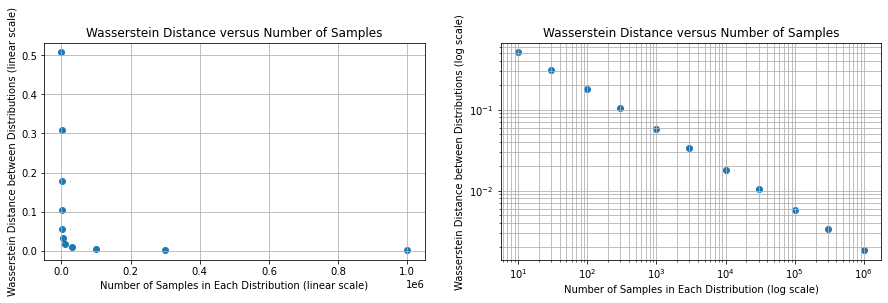

In [3]:
N = [10,30,100,300,1000,3000,10_000,30_000,100_000,300_000,1_000_000]
All_distances=pd.DataFrame([])
for i in range(1000):
    distances=[]
    for n in N:
        df = pd.DataFrame(np.random.uniform(size=(2,n)))
        df = pd.DataFrame(norm.ppf(df))
        distances.append(wasserstein_distance(df.loc[0,:], df.loc[1,:]))
    All_distances=pd.concat([All_distances,pd.DataFrame(distances).T])

#Plot results
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4))
ax1.set_title("Wasserstein Distance versus Number of Samples")

ax1.set_xlabel("Number of Samples in Each Distribution (linear scale)")
ax1.set_ylabel("Wasserstein Distance between Distributions (linear scale)")
ax1.grid(visible=True, which='both')
ax1.scatter(N, All_distances.mean())

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title("Wasserstein Distance versus Number of Samples")
ax2.set_xlabel("Number of Samples in Each Distribution (log scale)")
ax2.set_ylabel("Wasserstein Distance between Distributions (log scale)")
ax2.grid(visible=True, which='both')
ax2.scatter(N, All_distances.mean())